## Analyzing and segmenting the user and transactions data for the "iKhair.net"

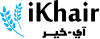

##### Set Up and Import Libraries

In [63]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load Data

In [64]:
users_df = pd.read_csv("Users.csv")  
transactions_df = pd.read_csv("UsersTransactions.csv")  


users_df.head()


,id,usagecounter,appver,datecreated
0,123490514,0,0.0.0,2024-06-23 16:23:29
1,123490513,0,0.0.0,2024-06-23 15:13:08
2,123490512,0,0.0.0,2024-06-23 15:07:51
3,123490511,0,0.0.0,2024-06-23 14:38:41
4,123490510,0,0.0.0,2024-06-23 12:26:17


In [65]:
transactions_df.head()

,id,userid,actid,orgid,amount,countryid,method,date,shortCode,projcetName,operator
0,1213989,1041242,kid3lag,HAI_AE,20,AE,SMS,2021-01-01 07:57:10,6620.0,other,etisalat
1,1213990,1041242,kid3lag,HAI_AE,20,AE,SMS,2021-01-01 07:57:11,6620.0,other,etisalat
2,1213991,1041242,SadakaGriha,IHSAN_AE,5,AE,SMS,2021-01-01 07:58:48,2217.0,الصدقة الجارية,etisalat
3,1213992,1041242,SadakaGriha,IHSAN_AE,5,AE,SMS,2021-01-01 07:58:49,2217.0,الصدقة الجارية,etisalat
4,1213993,1041242,SadakaGriha,SHJC_AE,10,AE,SMS,2021-01-01 07:58:54,6210.0,غسيل الكلي,etisalat


####  Unique Values and Value Counts

In [66]:
for col in transactions_df.select_dtypes(include='object').columns:
    print(f"\nUnique values in {col}:")
    print(transactions_df[col].value_counts())


Unique values in actid:
actid
3elag          6019
Water          4909
tafregKorab    4733
SadakaGriha    4335
Sadaka3ama     4284
               ... 
90624             1
Khair             1
90610             1
700               1
90686             1
Name: count, Length: 109, dtype: int64

Unique values in orgid:
orgid
HAI_AE         33348
IHSAN_AE       27443
AWQAFSH_AE     10874
SHJC_AE         2783
Aljalila_AE     2310
FARAJ_AE        2290
BKH_AE          1565
DCA_AE          1493
BIGHEART_AE      946
UAQ_AE           880
FUJ_AE           845
AMAF2_AE         564
FOCP_AE          497
TAR_AE           415
Quran_AE         395
TAMKEN_AE        335
MWISH_AE         155
SCHS_AE          150
RAS_AE           104
RAH_AE            76
PFCUAE_AE         57
AMAF_AE           52
8013              39
sakr_AE           26
DUCare_AE          1
AWQAF_AE           1
SUQ_AE             1
Name: count, dtype: int64

Unique values in countryid:
countryid
AE    88745
OM       21
Name: count, dtype: int

#### Check data types

In [67]:
print("Users Data Info:")
users_df.info()

print("\nTransactions Data Info:")
transactions_df.info()



Users Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            80000 non-null  int64 
 1   usagecounter  80000 non-null  int64 
 2   appver        80000 non-null  object
 3   datecreated   80000 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.4+ MB

Transactions Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88766 entries, 0 to 88765
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           88766 non-null  int64  
 1   userid       88766 non-null  int64  
 2   actid        61851 non-null  object 
 3   orgid        87645 non-null  object 
 4   amount       88766 non-null  int64  
 5   countryid    88766 non-null  object 
 6   method       88766 non-null  object 
 7   date         88766 non-null  object 
 8   shortCode    8

#### Check for missing values


In [68]:
print("\nMissing Values in Users Data:")
print(users_df.isnull().sum())

print("\nMissing Values in Transactions Data:")
print(transactions_df.isnull().sum())


Missing Values in Users Data:
id              0
usagecounter    0
appver          0
datecreated     0
dtype: int64

Missing Values in Transactions Data:
id                 0
userid             0
actid          26915
orgid           1121
amount             0
countryid          0
method             0
date               0
shortCode         90
projcetName      811
operator       23702
dtype: int64


#### Descriptive Statistics

In [69]:
print("Users Data Statistics:")
display(users_df.describe())

print("\nTransactions Data Statistics:")
display(transactions_df.describe())


Users Data Statistics:


,id,usagecounter
count,8.000000e+04,8.000000e+04
mean,5.501345e+07,2.557377e+02
std,5.820662e+07,1.082727e+04
min,2.054000e+04,0.000000e+00
25%,1.052507e+06,1.000000e+00
50%,1.057541e+07,2.000000e+00
75%,1.234703e+08,1.000000e+01
max,1.234905e+08,2.622432e+06



Transactions Data Statistics:


,id,userid,amount,shortCode
count,8.876600e+04,8.876600e+04,88766.000000,88676.000000
mean,8.249451e+06,7.732588e+07,31.549129,3497.970251
std,2.450441e+06,5.830644e+07,90.740091,2018.435841
min,1.213989e+06,0.000000e+00,0.000000,0.000000
25%,9.107527e+06,1.055039e+06,10.000000,2215.000000
50%,9.131560e+06,1.234693e+08,10.000000,2610.000000
75%,9.153751e+06,1.234832e+08,15.000000,4909.000000
max,9.176027e+06,1.234905e+08,1000.000000,261033.000000


### Data Cleaning

#### Unify the operator name

In [70]:
operator_mapping = {
    'إتصالات': 'Etisalat',
    'etisalat': 'Etisalat',
    'ETISALAT': 'Etisalat',
    'etisalat |': 'Etisalat',
    'دو': 'Du',
    'du': 'Du',
    'Carrier': 'Carrier',
    'Omnia': 'Omnia',
    'zain': 'Zain',
    'Blicnet': 'Blicnet'
}

transactions_df['operator']=transactions_df['operator'].str.strip()
transactions_df['operator'] = transactions_df['operator'].replace(operator_mapping)

print(transactions_df['operator'].value_counts())


operator
Etisalat    57008
Du           7989
Omnia          26
Zain           19
Carrier        17
Blicnet         5
Name: count, dtype: int64


#### Handling Duplicates

In [ ]:
# Check and remove duplicate rows in user_df
print("Duplicates in user_df before removal:", users_df.duplicated().sum())
users_df = users_df.drop_duplicates()
print("Duplicates in user_df after removal:", users_df
      .duplicated().sum())

# Check and remove duplicate rows in transactions_df
print("Duplicates in transactions_df before removal:", transactions_df.duplicated().sum())
transactions_df = transactions_df.drop_duplicates()
print("Duplicates in transactions_df after removal:", transactions_df.duplicated().sum())


Duplicates in user_df before removal: 0



##### Handle Missing Values

In [ ]:
transactions_df.fillna({
    'operator': 'Not-Specified',
    'actid': 'Unknown',
    'orgid':'UnKnown',
    'shortCode':-1.0,
    'projcetName': 'غير معروف'
}, inplace=True)



print(transactions_df.isnull().sum())

#### Handling Data Types

In [ ]:
#convert dtypes for users df
users_df['id'] = users_df['id'].astype('int32')
users_df['usagecounter'] = users_df['usagecounter'].astype('int32')
users_df['appver'] = users_df['appver'].astype('category')
users_df['datecreated'] = pd.to_datetime(users_df['datecreated'])
users_df.dtypes

In [ ]:
#convert dtypes for transactions df
transactions_df['actid'] = transactions_df['actid'].astype('category')
transactions_df['orgid'] = transactions_df['orgid'].astype('category')
transactions_df['countryid'] = transactions_df['countryid'].astype('category')
transactions_df['method'] = transactions_df['method'].astype('category')
transactions_df['projcetName'] = transactions_df['projcetName'].astype('category')
transactions_df['operator'] = transactions_df['operator'].astype('category')
transactions_df['id'] = transactions_df['id'].astype('int32')
transactions_df['userid'] = transactions_df['userid'].astype('int32')
transactions_df['amount'] = transactions_df['amount'].astype('int32')
transactions_df['shortCode'] = transactions_df['shortCode'].astype('category')
transactions_df['date'] = pd.to_datetime(transactions_df['date'])
transactions_df.dtypes

Join 2 DataFrames

In [ ]:
merged_df = users_df.merge(transactions_df, left_on='id', right_on='userid', how='right')
merged_df

In [ ]:
merged_df.info()

#### Users who made transactions 

In [ ]:
intersection = pd.merge(users_df, transactions_df, left_on='id',right_on='userid', how='inner')
distinct_intersection = intersection.drop_duplicates(subset='userid')
count_users_with_transactions = merged_df['userid'].drop_duplicates().count()
print(f"Number of users who made transactions: {count_users_with_transactions}")


#### Transaction count over time

In [ ]:
print("Date range in 'datecreated':", users_df['datecreated'].min(), "to", users_df['datecreated'].max())
print("Date range in 'date':", transactions_df['date'].min(), "to", transactions_df['date'].max())


transactions_df['date'].value_counts().sort_index().plot(title="Transactions over Time")
plt.xlabel("Date")
plt.ylabel("Number of Transactions")
plt.show()

#### Correlation Analysis

In [ ]:
print(merged_df[['usagecounter', 'amount']].corr())

The correlation of 1.0 between usagecounter and itself, and 1.0 for amount with itself, simply means that each variable is perfectly correlated with itself, which is always true.

The -0.020801 correlation between usagecounter and amount is very close to zero. This indicates that there’s no meaningful relationship between usagecounter and amount. In other words, changes in usagecounter don’t have any clear effect on amount, and vice versa.








#### Calculate Key Metrics per User

In [ ]:
user_metrics = merged_df.groupby('userid').agg({
    'amount': ['mean', 'sum'],  # Average and total transaction value
    'date': ['count', lambda x: x.dt.day_name().mode()[0], lambda x: x.dt.hour.mode()[0]]  # Number of purchases, top day, peak hour
}).reset_index()

user_metrics.columns = ['user_id', 'avg_transaction_value', 'total_transaction_value', 'purchase_count', 'top_day', 'peak_hour']
user_metrics


#### Get top 10 donors by total transaction value

In [ ]:
top_donors = user_metrics.nlargest(10, 'total_transaction_value')
print("Top 10 Donors:\n", top_donors[['user_id', 'total_transaction_value']])

#### User Segmentation Using Clustering based on Activity and Spending using K-means

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

features = user_metrics[['avg_transaction_value', 'purchase_count']]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)  # Assuming 3 clusters
user_metrics['segment'] = kmeans.fit_predict(features_scaled)

segment_labels = {0: 'Low Spenders', 1: 'Moderate Spenders', 2: 'High Spenders'}
user_metrics['segment_label'] = user_metrics['segment'].map(segment_labels)

#### Analyze Segments 

In [ ]:
segment_analysis = user_metrics.groupby('segment_label').agg({
    'avg_transaction_value': 'mean',
    'purchase_count': 'mean',
    'total_transaction_value': 'mean',
    'top_day': lambda x: x.mode()[0],
    'peak_hour': lambda x: x.mode()[0]
}).reset_index()

print("Segment Analysis:\n", segment_analysis)


#### Visualize the Segments

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=segment_analysis, x='segment_label', y='avg_transaction_value')
plt.title("Average Transaction Value by Segment")
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=segment_analysis, x='segment_label', y='peak_hour')
plt.title("Peak Purchase Hour by Segment")
plt.show()


####  Top Day & Peak Hour

In [ ]:
top_day = transactions_df['date'].dt.day_name().mode()[0]
print("Top day for purchases:", top_day)

peak_hour = transactions_df['date'].dt.hour.mode()[0]
print("Peak hour for purchases:", peak_hour)


### Lets Explore Customer Behavior More 🕸️

#### Analyzing amount Distribution and High-Value Customers

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(merged_df['amount'], bins=30, kde=True)
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()

# Identify high-value customers by the top 5% spenders
high_value_threshold = merged_df['amount'].quantile(0.95)
high_value_customers = merged_df[merged_df['amount'] >= high_value_threshold]
print("Top 5% high-value customers:\n", high_value_customers[['userid', 'amount']].head(10))


#### Purchasing Trends over Time

In [ ]:
# Monthly transaction counts
merged_df['month_year'] = merged_df['date'].dt.to_period('M')
monthly_transactions = merged_df['month_year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
monthly_transactions.plot(kind='line')
plt.title("Monthly Transaction Volume")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.show()

# Analyzing day of the week
merged_df['day_of_week'] = merged_df['date'].dt.day_name()
plt.figure(figsize=(10, 5))
sns.countplot(data=merged_df, x='day_of_week', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Transactions by Day of the Week")
plt.xlabel("Day of Week")
plt.ylabel("Transaction Count")
plt.show()


#### Top Channels and Methods of Purchase

In [ ]:
print("Transaction count by method:\n", transactions_df['method'].value_counts())

plt.figure(figsize=(10, 5))
sns.countplot(data= transactions_df, y='method', order= transactions_df['method'].value_counts().index)
plt.title("Transaction Count by Method")
plt.xlabel("Count")
plt.ylabel("Method")
plt.show()

# Top 5 project names and short codes
top_projects =  transactions_df['projcetName'].value_counts().head(5)
top_short_codes =  transactions_df['shortCode'].value_counts().head(5)
print("Top 5 Project Names:\n", top_projects)
print("Top 5 Short Codes:\n", top_short_codes)


#### Peak Hour Analysis

In [ ]:
transactions_df['hour'] = transactions_df['date'].dt.hour

# Plot transaction count by hour
plt.figure(figsize=(10, 5))
sns.countplot(data=transactions_df, x='hour')
plt.title("Transaction Count by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Transaction Count")
plt.show()


#### Cross Analysis of countryid and operator

In [ ]:
country_counts = merged_df['countryid'].value_counts().head(10)
print("Top 10 Countries by Transaction Count:\n", country_counts)

plt.figure(figsize=(12, 6))
sns.countplot(data=merged_df[merged_df['countryid'].isin(country_counts.index)], y='countryid', hue='operator')
plt.title("Transactions by Country and Operator")
plt.xlabel("Count")
plt.ylabel("Country")

plt.legend(title="Operator", loc='lower right', bbox_to_anchor=(1, 0))

plt.show()


#### Top Operators for High-Value Transactions

In [ ]:
high_value_threshold = transactions_df['amount'].quantile(0.95)
high_value_transactions = transactions_df[transactions_df['amount'] >= high_value_threshold]

# Count high-value transactions by operator
high_value_by_operator = high_value_transactions['operator'].value_counts()
print("High-value transaction counts by operator:\n", high_value_by_operator)

# Plot high-value transaction counts by operator
plt.figure(figsize=(12, 6))
high_value_by_operator.plot(kind='barh', color='salmon')
plt.title("High-Value Transactions by Operator")
plt.xlabel("Transaction Count")
plt.ylabel("Operator")
plt.show()
